In [104]:
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

HOMEWORK 1
Build a classifier for fashion MNIST.

1. Use exactly the same architectures (both densely connected layers and from convolutional layers) as the above MNIST e.g., replace the dataset. Save the Jupyter Notebook in its original format and output a PDF file after training, testing, and validation. Make sure to write down how do they perform (training accuracny, testing accuracy).
2. Improve the architecture. Experiment with different numbers of layers, size of layers, number of filters, size of filters. You are required to make those adjustment to get the highest accuracy. Watch out for overfitting -- we want the highest testing accuracy! Please provide a PDF file of the result, the best test accuracy and the architecture (different numbers of layers, size of layers, number of filters, size of filters)

In [107]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='mean_squared_error',
metrics=['accuracy'])

train_images_flat = train_images.reshape((60000, 28 * 28))
train_images_flat = train_images_flat.astype('float32') / 255
test_images_flat = test_images.reshape((10000, 28 * 28))
test_images_flat = test_images_flat.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images.reshape((60000,28*28)).shape

model.fit(train_images_flat, train_labels, epochs=10, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0317 - accuracy: 0.7799
Epoch 2/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0207 - accuracy: 0.8582
Epoch 3/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0185 - accuracy: 0.8724
Epoch 4/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0170 - accuracy: 0.8834
Epoch 5/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0164 - accuracy: 0.8880
Epoch 6/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0155 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0150 - accuracy: 0.8994
Epoch 8/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0145 - accuracy: 0.9017
Epoch 9/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0141 - accuracy: 0.9052
Epoch 10/10
60

In [109]:
test_loss, test_acc = model.evaluate(test_images_flat, test_labels)
print(f'test accuracy: {test_acc}')

test accuracy: 0.8842999935150146


[3.1008202e-01 2.7938515e-01 3.9449881e-04 2.6109755e-01 2.7240140e-04
 5.3294832e-07 1.4871316e-01 1.0060092e-07 5.4574037e-05 1.1384736e-09]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


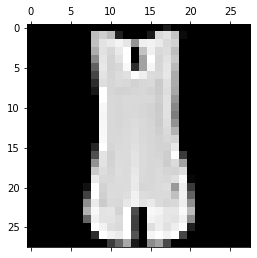

In [110]:
predictions = model.predict(train_images_flat[:13])
img_num = 4
print(predictions[img_num])
print(train_labels[img_num])
plt.matshow(train_images[img_num], cmap='gray')
plt.show()

In [111]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
train_images_conv = train_images.reshape((60000, 28, 28, 1))
train_images_conv = train_images_conv.astype('float32') / 255
test_images_conv = test_images.reshape((10000, 28, 28, 1))
test_images_conv = test_images_conv.astype('float32') / 255

model2.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model2.fit(train_images_conv, train_labels, epochs=8, batch_size=64)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 11s 190us/sample - loss: 0.5553 - accuracy: 0.7952
Epoch 2/8
60000/60000 [==============================] - 11s 178us/sample - loss: 0.3363 - accuracy: 0.8776
Epoch 3/8
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2840 - accuracy: 0.8972
Epoch 4/8
60000/60000 [==============================] - 10s 166us/sample - loss: 0.2521 - accuracy: 0.9083
Epoch 5/8
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2292 - accuracy: 0.9159
Epoch 6/8
60000/60000 [==============================] - 10s 167us/sample - loss: 0.2105 - accuracy: 0.9227
Epoch 7/8
60000/60000 [==============================] - 10s 171us/sample - loss: 0.1939 - accuracy: 0.9292
Epoch 8/8
60000/60000 [==============================] - 10s 167us/sample - loss: 0.1807 - accuracy: 0.9336


In [114]:
test_loss, test_acc = model2.evaluate(test_images_conv, test_labels)
print(f'test accuracy: {test_acc}')

test accuracy: 0.9096999764442444


[3.3107010e-09 7.5370151e-20 3.0884661e-14 5.8351337e-22 3.3076137e-17
 1.0000000e+00 3.4019350e-11 7.9130170e-13 5.5454773e-14 1.6382093e-13]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


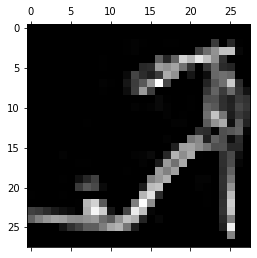

In [115]:
predictions = model2.predict(train_images_conv[:13])
img_num = 8
print(predictions[img_num])
print(train_labels[img_num])
plt.matshow(train_images[img_num], cmap='gray')
plt.show()

In [116]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images.reshape((60000,28*28))

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

train_images_conv = train_images.reshape((60000, 28, 28, 1))
train_images_conv = train_images_conv.astype('float32') / 255
test_images_conv = test_images.reshape((10000, 28, 28, 1))
test_images_conv = test_images_conv.astype('float32') / 255

model2.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model2.fit(train_images_conv, train_labels, epochs=4, batch_size=64)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 38s 633us/sample - loss: 0.5127 - accuracy: 0.8138
Epoch 2/4
60000/60000 [==============================] - 41s 677us/sample - loss: 0.3008 - accuracy: 0.8905
Epoch 3/4
60000/60000 [==============================] - 40s 661us/sample - loss: 0.2525 - accuracy: 0.9083
Epoch 4/4
60000/60000 [==============================] - 39s 658us/sample - loss: 0.2203 - accuracy: 0.9193


In [117]:
test_loss, test_acc = model2.evaluate(test_images_conv, test_labels)
print(f'test accuracy: {test_acc}')

test accuracy: 0.9064000248908997


[2.5191978e-08 1.5257122e-10 1.6330008e-08 3.8754500e-08 1.3681105e-08
 9.9999249e-01 1.1286445e-08 4.7025646e-06 2.5639431e-06 1.0083376e-07]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


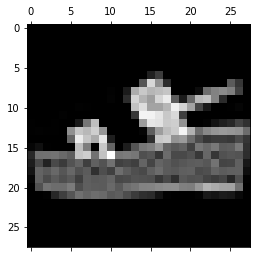

In [118]:
predictions = model2.predict(train_images_conv[:13])
img_num = 12
print(predictions[img_num])
print(train_labels[img_num])
plt.matshow(train_images[img_num], cmap='gray')
plt.show()

HOMEWORK 2:

Write a function that takes as arguments the name of the layer and filter index and outputs the displayable filter response.
Then you can choose different filters and visualize which patterns they are responsive too! Submit the code (as Notebook) and at least 3 filter responses (a PDF file).

In [119]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
import tensorflow as tf

tf.compat.v1.disable_eager_execution()
model = VGG16(weights='imagenet', include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

grads = K.gradients(loss, model.input)[0]
iterate = K.function([model.input], [loss, grads])
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [120]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [121]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

#Postprocess to turn into displayable image

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

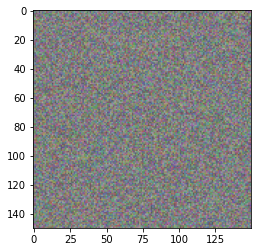

In [82]:
plt.imshow(deprocess_image(input_img_data[0]))

In [95]:
def displayable_response(layer_n, filter_i):
    
    layer_name = layer_n
    filter_index = filter_i
    
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
    
    input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
    
    step = 1.
    
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    x = input_img_data[0]
    
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    x += 0.5
    x = np.clip(x, 0, 1)

    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    
    return x

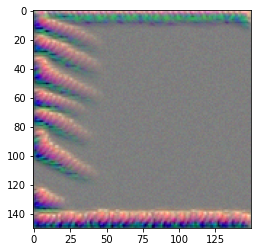

In [100]:
plt.imshow(displayable_response('block2_conv2', 4))
plt.savefig("response1.pdf")

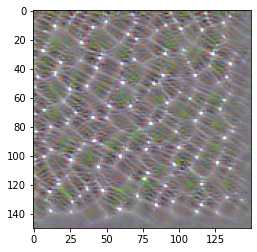

In [101]:
plt.imshow(displayable_response('block4_conv1', 8))
plt.savefig("response2.pdf")

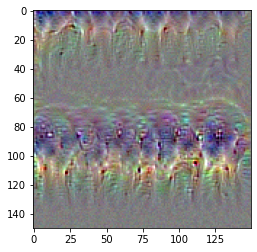

In [103]:
plt.imshow(displayable_response('block4_pool', 10))
plt.savefig("response3.pdf")